# Correlation - Person, Spearman, Kendall

In [3]:
import pandas as pd 
import numpy as np 
import math 

from matplotlib import pyplot as plt 

plt.style.use('seaborn')

In the first exercise, we implemented a function to calculate the covariance between two variables, $x$ and $y$.

$$\text{cov}(X, Y) = \frac{\sum_{i=1}^n{(x_i - \bar{x})(y_i - \bar{y})}}{n-1}$$

Where:

- $x_i$ corresponds to the value with index $i$ of the variable $X$.
- $\bar{x}$ corresponds to the average of the variable $X$.
- $y_i$ corresponds to the value with index $i$ of the variable $Y$.
- $\bar{y}$ corresponds to the average of the variable $Y$.
- $n$ corresponds to the total number of pairs $(x_i, y_i)$ in the sample.

In [10]:
    ### BEGIN SOLUTION 
def covariance(X, Y):
        med_X = X.mean()
        med_Y = Y.mean()
        n = X.size
        return ((X - med_X)*(Y - med_Y)).sum()/(n-1)
    ### END SOLUTION 

**We will validate against the implementation in Pandas.**

In [11]:
a = pd.Series([1, 5, 7, 10, 25])
b = pd.Series([15, 30, 28, 45, 50])

cov_ab = round(covariance(a, b), 2)
print('The covariance between `a` and `b` is {}.'.format(cov_ab))

The covariance between `a` and `b` is 112.05.


In [12]:
cov_ab_ = round(a.cov(b), 2)
print('The covariance between `a` and `b` is {}.'.format(cov_ab_))

The covariance between `a` and `b` is 112.05.


### Tests

In [13]:
t1 = pd.Series([1, 5, 7, 10, 25])
t2 = pd.Series([15, 30, 28, 45, 50]) 
t3 = pd.Series([22, 55, 23, 15, 92])

assert math.isclose(covariance(t1, t2), 112.05)
assert math.isclose(covariance(t1, t3), 230.2)

Pearson's correlation, $r_{xy}$, is a normalized form of covariance:

$$ r_{XY} = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y} $$

Where:

- $\sigma_X$ corresponds to the standard deviation of $X$.
- $\sigma_Y$ corresponds to the standard deviation of $Y$.

We will also implement Pearson's correlation, using our `covariance` function.

In [15]:
    
    ### BEGIN SOLUTION 
def pearson_correlation(X, Y):
        dp_X = X.std()
        dp_Y = Y.std()
        return X.cov(Y)/((dp_X)*(dp_Y))
    ### END SOLUTION

Mais uma vez, validamos contra a implementação de Pandas.

In [16]:
r_ab = round(pearson_correlation(a, b), 2)
print('Pearson\'s correlation between `a` and `b` is {}.'.format(r_ab))

Pearson's correlation between `a` and `b` is 0.87.


In [17]:
r_ab_ = round(a.corr(b), 2)
print('Pearson\'s correlation between `a` and `b` is {}.'.format(r_ab_))

Pearson's correlation between `a` and `b` is 0.87.


### Tests

In [18]:
assert math.isclose(pearson_correlation(t1, t2), 0.8662642506328923)
assert math.isclose(pearson_correlation(t2, t3), 0.5210578887070213)

Now, let's implement Spearman's correlation:

$$ r_{XY} = \frac{\text{cov}(R(X), R(Y))}{\sigma_{R(X)} \sigma_{R(Y)}} $$

Where:

- $R(X)$ corresponds to the * rankings * of $X$.
- $R(Y)$ corresponds to the * rankings * of $Y$.

In [19]:
    
    ### BEGIN SOLUTION 

def spearman_correlation(X, Y):
        r_X = X.rank()
        r_Y = Y.rank()
        return pearson_correlation(r_X, r_Y)
        ### END SOLUTION 

**We compare it with the implementation of Pandas.**

In [20]:
import time
start_time = time.time()
rho_ab = round(spearman_correlation(a, b), 2)
print('The Spearman correlation between `a` and` b` is {}.'.format(rho_ab))
print('\n')
print("--- %s seconds ---" % (time.time() - start_time))

The Spearman correlation between `a` and` b` is 0.9.


--- 0.007876157760620117 seconds ---


In [21]:
start_time = time.time()
rho_ab_ = round(a.corr(b, method='spearman'), 2)
print('The Spearman correlation between `a` and` b` is {}.'.format(rho_ab_))
print('\n')
print("--- %s seconds ---" % (time.time() - start_time))

The Spearman correlation between `a` and` b` is 0.9.


--- 0.6227638721466064 seconds ---


### Tests

In [22]:
assert math.isclose(spearman_correlation(t1, t2), t1.corr(t2, method='spearman'), abs_tol=.1)
assert math.isclose(spearman_correlation(t2, t3), t2.corr(t3, method='spearman'), abs_tol=.1)
assert math.isclose(spearman_correlation(t3, t1), t3.corr(t1, method='spearman'), abs_tol=.1)

----

**Finally, let's explore an example, house prices, with an outlier (e.g., the home of someone famous).**

**We will start by simulating an outlier.**

In [25]:
def simulate_outlier(): 
    """
     Necessary data for the simulation of an outlier in house prices.

     Returns:
         number of rooms (pd.Series): the number of rooms for each house
         price (pd.Series): the price for each house
         price_com_outlier (pd.Series): the price for each house with an outlier entered manually

     """
    data = pd.read_csv('HousingData.csv', usecols=['house_price', 'number_of_rooms'])

    number_of_rooms = data['number_of_rooms']
    price = data['house_price']

    price_with_outlier = price.copy()
    price_with_outlier.loc[3] = 500
    
    return number_of_rooms, price, price_with_outlier


n_rooms, p, p_outlier = simulate_outlier()

**Let's see the result.**

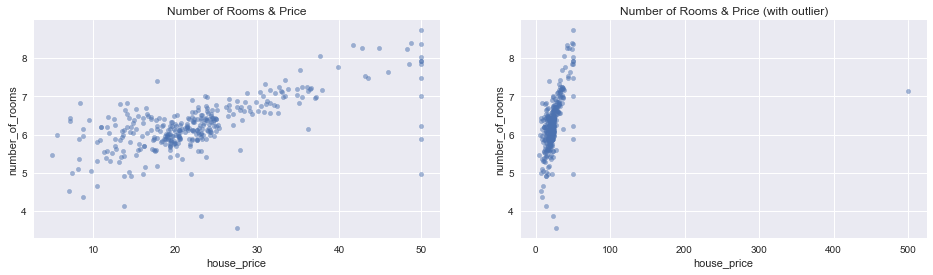

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

pd.concat([n_rooms, p], axis=1).plot(kind='scatter', 
                                       alpha=.5,
                                       y='number_of_rooms',
                                       x='house_price', 
                                       ax=axes[0], 
                                       title='Number of Rooms & Price')

pd.concat([n_rooms, p_outlier], axis=1).plot(kind='scatter', 
                                               alpha=.5,
                                               y='number_of_rooms',
                                               x='house_price',
                                               ax=axes[1],
                                               title='Number of Rooms & Price (with outlier)');

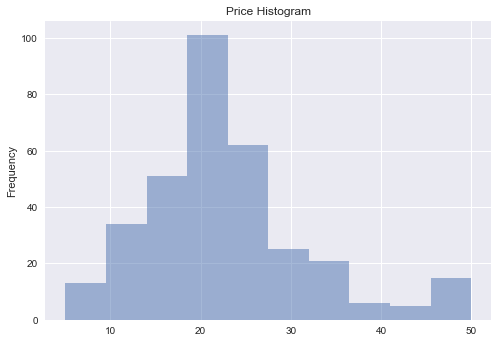

In [27]:
p.plot.hist(alpha=.5, title='Price Histogram');

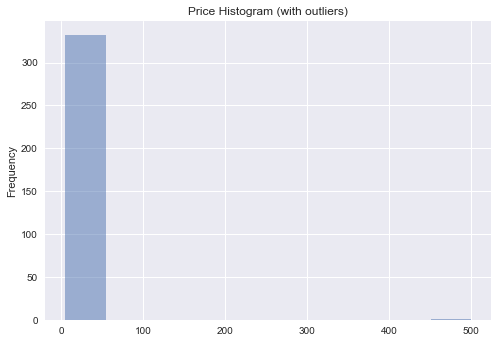

In [28]:
p_outlier.plot.hist(alpha=.5, title='Price Histogram (with outliers)');

**Intuitively, what is the expected impact of the outlier on the above correlation measures?**

**Now, we calculate the Pearson and Spearman correlations for both cases: with and without outlier.**

In [29]:
### BEGIN SOLUTION
pearson_correlation_without_outlier = pearson_correlation(n_rooms,p)
pearson_correlation_with_outlier = pearson_correlation(n_rooms,p_outlier)

spearman_correlation_without_outlier = spearman_correlation(n_rooms,p)
spearman_correlation_with_outlier = spearman_correlation(n_rooms,p_outlier)
 
### END SOLUTION

In [30]:
results = pd.Series({
    'Pearson without outlier': pearson_correlation_without_outlier,
    'Pearson with outlier': pearson_correlation_with_outlier,
    'Spearman without outlier': spearman_correlation_without_outlier,
    'Spearman with outlier': spearman_correlation_with_outlier,
})

display(results)

Pearson without outlier     0.689598
Pearson with outlier        0.291450
Spearman without outlier    0.635173
Spearman with outlier       0.635284
dtype: float64

**Does this result confirm our intuition?**

**Finally, we calculate Kendall's correlation, also based on rankings (like Spearman), ideal for small datasets and outliers.**

In [31]:
### BEGIN SOLUTION
kendall_correlation_without_outlier = n_rooms.corr(p, method='kendall')
kendall_correlation_with_outlier =n_rooms.corr(p_outlier, method='kendall')

### END SOLUTION

In [32]:
results_ = results.append(pd.Series({
    'Kendall without outlier': kendall_correlation_without_outlier,
    'Kendall with outlier': kendall_correlation_with_outlier
}))

display(results_)

Pearson without outlier     0.689598
Pearson with outlier        0.291450
Spearman without outlier    0.635173
Spearman with outlier       0.635284
Kendall without outlier     0.485090
Kendall with outlier        0.484560
dtype: float64

**How to interpret this result, considering the robustness of the different measures of correlation to outliers?**

- In this particular case Person's correlation was definitely impacted by the simulated outlier, as it paints an overly simplistic reallity and provides us with a normalized covariance betweeen values. Whereas Spearman's and Kendall's results remained the same. This shows that categorizing observations in ranks, strengthens the method's correlation robustness, in this example to outliers.   

### Tests

In [34]:
assert math.isclose((pearson_correlation_with_outlier - pearson_correlation_without_outlier), -0.39814771546286415, abs_tol=.01)
assert math.isclose((spearman_correlation_with_outlier - spearman_correlation_without_outlier), 0, abs_tol=.01)
assert math.isclose((kendall_correlation_with_outlier - kendall_correlation_without_outlier), 0, abs_tol=.01)